In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as ols
from statsmodels.tools.eval_measures import rmse
%matplotlib inline

# Regression

> 부품 수에 따른 수리 소요 시간 데이터이다. 소요시간을 예측하기 위한 회귀분석을 실시하고 결과를 해석하라  
> 회귀분석 절차
>1. 분석에 필요한 데이터 구성하기
>2. 변수 간의 경향성 파악 - 그래프 분석
>3. 회귀 모델 생성
>>* ANOVA분석결과
>>* 결정계수 확인
>>* 추정의 표본오차 확인
>>* 회귀계수 유의성 검토
>4. 오차의 기본가정 검토
>5. 결론 도출

---

## 분석에 필요한 데이터 구성하기

In [3]:
ds_repair = pd.read_csv("./부품수리시간.csv", engine='python')
ds_repair.head()

,UNITS,MINUTES
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


---

## 변수 간의 경향성 파악 - 그래프 분석

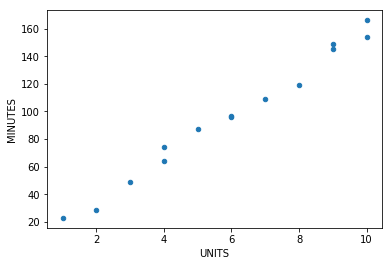

In [4]:
ds_repair.plot.scatter(x="UNITS",y="MINUTES")

In [5]:
ds_repair.corr(method="pearson").round(3)

,UNITS,MINUTES
UNITS,1.000,0.994
MINUTES,0.994,1.000


---

## 회귀 모델 생성

In [6]:
ds_repair_x = ds_repair["UNITS"]
ds_repair_y = ds_repair["MINUTES"]

In [7]:
ds_repair_x_const = sm.add_constant(ds_repair_x)

In [14]:
ds_repair_x_const

,const,UNITS
0,1.0,1
1,1.0,2
2,1.0,3
3,1.0,4
4,1.0,4
5,1.0,5
6,1.0,6
7,1.0,6
8,1.0,7
9,1.0,8


In [24]:
reg_model = sm.OLS(ds_repair_y, ds_repair_x_const)
reg_results = reg_model.fit()
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:                MINUTES   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     943.2
Date:                Tue, 29 Jan 2019   Prob (F-statistic):           8.92e-13
Time:                        17:19:47   Log-Likelihood:                -42.374
No. Observations:                  14   AIC:                             88.75
Df Residuals:                      12   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1617      3.355      1.240      0.2

/home/pirl/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


In [22]:
reg_results.params

const     4.161654
UNITS    15.508772
dtype: float64

In [23]:
reg_results.fittedvalues

0      19.670426
1      35.179198
2      50.687970
3      66.196742
4      66.196742
5      81.705514
6      97.214286
7      97.214286
8     112.723058
9     128.231830
10    143.740602
11    143.740602
12    159.249373
13    159.249373
dtype: float64

In [26]:
reg_results.resid

0     3.329574
1    -6.179198
2    -1.687970
3    -2.196742
4     7.803258
5     5.294486
6    -1.214286
7    -0.214286
8    -3.723058
9    -9.231830
10    5.259398
11    1.259398
12   -5.249373
13    6.750627
dtype: float64

---

## 오차의 기본가정 검토

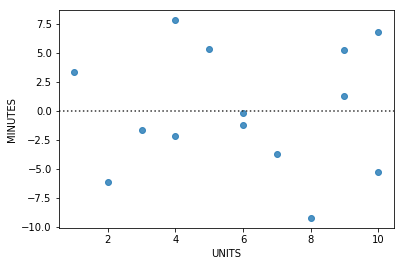

In [9]:
sns.residplot(ds_repair_x, ds_repair_y)

In [30]:
obs = reg_results.resid.values

((array([-1.66151682, -1.18948235, -0.88997893, -0.65463235, -0.45108016,
         -0.2648058 , -0.08735875,  0.08735875,  0.2648058 ,  0.45108016,
          0.65463235,  0.88997893,  1.18948235,  1.66151682]),
  array([-9.23182957, -6.17919799, -5.24937343, -3.72305764, -2.19674185,
         -1.68796992, -1.21428571, -0.21428571,  1.2593985 ,  3.32957393,
          5.2593985 ,  5.29448622,  6.75062657,  7.80325815])),
 (5.48747823811458, -4.567774729886359e-15, 0.9900152558575118))

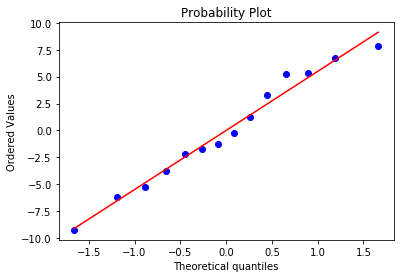

In [31]:
stats.probplot(obs, dist="norm",plot=plt)

---

In [ ]:
ds_repair = pd.read_csv("./부품수리시간.csv", engine='python')